<a href="https://colab.research.google.com/github/Loomer/2022-itc303-team08/blob/ml-manu/secondModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Cloning repository from github
!git clone -b ml-manu https://github.com/Loomer/2022-itc303-team08


Cloning into '2022-itc303-team08'...
remote: Enumerating objects: 2966, done.
remote: Counting objects: 100% (276/276), done.
remote: Compressing objects: 100% (214/214), done.
remote: Total 2966 (delta 59), reused 276 (delta 59), pack-reused 2690
Receiving objects: 100% (2966/2966), 553.70 MiB | 22.77 MiB/s, done.
Resolving deltas: 100% (159/159), done.
Checking out files: 100% (1525/1525), done.


In [2]:
#Importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


In [19]:
#Importing modules to be used in model development
import matplotlib.pyplot as pypt 
import numpy as np
import cv2
import os 

In [17]:
image_set = "/content/2022-itc303-team08/images/train" #Getting the images for the training set
imageType = ["COVID", "NORMAL"] #Classifying the image set as normal and covid
train_set = []
train_labels = []

#Function for creating training data
def create_train_data():
  for imgType in imageType: 
    x = 0
    link = os.path.join(image_set, imgType) #Creating path for covid and normal lung images
    print(link)
         
    for img in os.listdir(link): 
      if img == "Thumbs.db":
        continue 
      img_array = cv2.imread(os.path.join(link, img)) #Converting image to array  
      new_img_array = cv2.resize(img_array, (250, 250)) #Resizing the image array  
      train_set.append(new_img_array) #Adding array to training set
      train_labels.append(0) #Adding labels to training labels
      x = x + 1
      if (x >= 30):
        break;
        x = 0

#Calling the function to create training data
create_train_data()
print(len(train_set))
#pypt.imshow(train_set[19])
print(train_set[0].shape)
print(train_labels)

/content/2022-itc303-team08/images/train/COVID
/content/2022-itc303-team08/images/train/NORMAL
60
(250, 250, 3)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [18]:
second_image_set = "/content/2022-itc303-team08/images/train/Xrays"
for img in os.listdir(second_image_set):
  link = os.path.join(second_image_set, img)
  img_array = cv2.imread(os.path.join(second_image_set, img)) #Converting image to array  
  new_img_array = cv2.resize(img_array, (250, 250)) #Resizing the image array  
  #abc = cv2.cvtColor(new_img_array, cv2.COLOR_BGR2GRAY)
  #xyz = np.expand_dims(abc, axis=-3)
  train_set.append(new_img_array) #Adding array to training set
  train_labels.append(1) #Adding labels to training labels

print(len(train_set))
print(train_labels)

160
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [74]:
from google.colab.patches import cv2_imshow

second_image_set = "/content/2022-itc303-team08/images/train/INVALID"
for img in os.listdir(second_image_set):
  link = os.path.join(second_image_set, img)
  img_array = cv2.imread(os.path.join(second_image_set, img)) #Converting image to array  
  new_img_array = cv2.resize(img_array, (250, 250)) #Resizing the image array  
  abc = cv2.cvtColor(new_img_array, cv2.COLOR_BGR2GRAY)
  xyz = np.expand_dims(abc, axis=-3)
  train_set.append(xyz) #Adding array to training set
  train_labels.append(1) #Adding labels to training labels

print(len(train_set))
for x in range(20, 39):
  cv2_imshow(train_set[x])
print(train_labels)
for x in range(39):
  print(train_set[x].shape)

40


error: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:2142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if v not in values:


ValueError: ignored

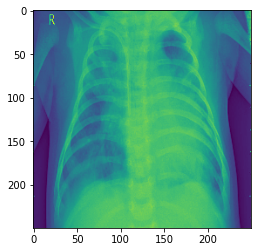

In [47]:
image = train_set[8]
pypt.imshow(image)
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
pypt.imshow(grayImage)  
(thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
pypt.imshow('Black white image', blackAndWhiteImage)

120
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


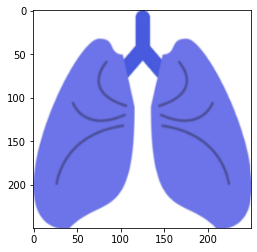

In [ ]:
print(len(train_set))
pypt.imshow(train_set[119])
print(train_labels)

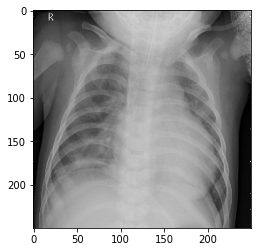

In [19]:
train_set = np.array(train_set) #Converting training set to numpy array
train_labels = np.array(train_labels) #Converting training labels to numpy array
train_set = train_set/255.0 #Dividing by 255.0 to have the values between 0 and 1
pypt.imshow(train_set[0])

In [7]:
#Function for creating the model
def create_model():
  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
    tf.keras.layers.Dense(1, activation=tf.nn.softmax)])

  #Compiling the model
  model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [8]:
#Function for creating the model
def create_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(250, 250, 3)), #First layer
    tf.keras.layers.MaxPooling2D(2, 2), #Pooling the pixels
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(250, 250, 3)), #Second layer
    tf.keras.layers.MaxPooling2D(2,2), #Pooling the pixels
    tf.keras.layers.Flatten(), #Flattening the input into a single dimension
    tf.keras.layers.Dropout(0.5), #Dropping out neurons to improve accuracy
    tf.keras.layers.Dense(512, activation=tf.nn.relu), #Dense layer
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)]) #Dense layer

  #Compiling the model
  model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [20]:
#Creating a model
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 248, 248, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 124, 124, 64)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 238144)            0         
                                                                 
 dropout_1 (Dropout)         (None, 238144)           

In [21]:
model.fit(train_set, train_labels, epochs=10)

Epoch 1/10
5/5 [==============================] - 31s 6s/step - loss: 12.5867 - accuracy: 0.5063
Epoch 2/10
5/5 [==============================] - 29s 6s/step - loss: 1.2736 - accuracy: 0.5500
Epoch 3/10
5/5 [==============================] - 30s 6s/step - loss: 0.6231 - accuracy: 0.6438
Epoch 4/10
5/5 [==============================] - 29s 6s/step - loss: 0.4479 - accuracy: 0.7688
Epoch 5/10
5/5 [==============================] - 29s 6s/step - loss: 0.2163 - accuracy: 0.9312
Epoch 6/10
5/5 [==============================] - 29s 6s/step - loss: 0.1160 - accuracy: 0.9625
Epoch 7/10
5/5 [==============================] - 30s 6s/step - loss: 0.1129 - accuracy: 0.9500
Epoch 8/10
5/5 [==============================] - 29s 6s/step - loss: 0.0714 - accuracy: 0.9688
Epoch 9/10
5/5 [==============================] - 29s 6s/step - loss: 0.0313 - accuracy: 0.9937
Epoch 10/10
5/5 [==============================] - 30s 6s/step - loss: 0.0189 - accuracy: 0.9937


In [31]:
#Saving the model in a h5 file 
model.save('checker.h5', include_optimizer=False)

In [32]:
def get_file_size (path):
  size = os.path.getsize(path)
  print (str(round(size/(1024*1024), 3)) + "MB")

get_file_size ('checker.h5')

465.302MB


In [5]:
#loading the saved model
loaded_model = tf.keras.models.load_model('checker.h5')

In [6]:
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
#tflite_model = tflite_converter.convert()
#open("tf_lite_checker.tflite", "wb").write(tflite_model)

In [7]:
tflite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_converter.target_spec.supported_types = [tf.float16]

In [8]:
optimized_model = tflite_converter.convert()
open("tflite_checker_fp16", "wb").write(optimized_model)
#tflite_model_fp16.write_bytes(optimized_model)

INFO:tensorflow:Assets written to: /tmp/tmpgkupm576/assets


243944208

In [11]:
interpreter = tf.lite.Interpreter("tflite_checker_fp16")
interpreter.allocate_tensors()

In [12]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(250, 250))
  test_image = image.img_to_array(img)
  test_image = np.expand_dims(test_image, axis=0).astype(np.float32)

  #images = np.vstack([test_image])
  
  #test_image = np.expand_dims(test_images[0], axis=0).astype(np.float32)

  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  interpreter.set_tensor(input_index, test_image)
  interpreter.invoke()
  predictions = interpreter.get_tensor(output_index)
  predict=str(np.argmax(predictions[0]))
  print (predict)

Saving covid_image.png to covid_image.png
0


In [22]:
from keras.preprocessing import image
dir = "/content/2022-itc303-team08/images/test/COVID"
total = 0
correct = 0
for img in os.listdir(dir):
  path = os.path.join(dir, img)
  img = image.load_img(path, target_size=(250, 250))
  test_image = image.img_to_array(img)
  test_image = np.expand_dims(test_image, axis=0).astype(np.float32)

  #images = np.vstack([test_image])
  
  #test_image = np.expand_dims(test_images[0], axis=0).astype(np.float32)

  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  interpreter.set_tensor(input_index, test_image)
  interpreter.invoke()
  predictions = interpreter.get_tensor(output_index)
  #predict=str(np.argmax(predictions[0]))
  #print (predictions)
  print (np.argmax(predictions[0]))

print(correct, " images out of ", total, " images are predicted as Xrays.")

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0  images out of  0  images are predicted as Xrays.


In [30]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(250, 250))
  print(type(img))
  test_image = image.img_to_array(img)
  test_image = np.expand_dims(test_image, axis=0)

  images = np.vstack([test_image])
  prediction = model.predict(images)
  print(fn)
  print(prediction)
  print(np.argmax(prediction[0]))

Saving Screenshot 2022-08-05 182800.png to Screenshot 2022-08-05 182800.png
<class 'PIL.Image.Image'>
Screenshot 2022-08-05 182800.png
[[1.000000e+00 8.248823e-35]]
0


In [23]:
from keras.preprocessing import image
dir = "/content/2022-itc303-team08/images/test/COVID"
total = 0
correct = 0
for img in os.listdir(dir):
  path = os.path.join(dir, img)
  subject = image.load_img(path, target_size=(250, 250))
  test_image = image.img_to_array(subject)
  test_image = np.expand_dims(test_image, axis=0)
  total = total + 1
  print(type(test_image))
  prediction = model.predict(test_image)
  answer = np.argmax(prediction[0])
  print(answer)
  if answer == 0:
    correct = correct + 1

print(correct, " images out of ", total, " images are predicted as Xrays.")

<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'numpy.ndarray'>
0
<class 'nump

In [25]:
def is_Xray(image):
    count = 0
    total_count = 0
    img = image.convert('RGB')
    w, h = img.size
    for i in range(w):
        for j in range(h):
            r, g, b = img.getpixel((i,j))
            total_count = total_count + 1
            if r != g != b: 
                count = count + 1

    acceptable_value = total_count/20
    if count > acceptable_value:
        print(count, acceptable_value, total_count)
        return False           
    else:
        return True

In [35]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(250, 250))

  answer = is_Xray(img)
  print(answer)

  test_image = image.img_to_array(img)
  test_image = np.expand_dims(test_image, axis=0)
  

"""
  images = np.vstack([test_image])
  prediction = model.predict(images)
  print(fn)
  print(prediction)
  print(type(prediction))

  print([np.argmax(prediction[0])])"""

Saving Screenshot 2022-08-04 182234.png to Screenshot 2022-08-04 182234.png
True


'\n  images = np.vstack([test_image])\n  prediction = model.predict(images)\n  print(fn)\n  print(prediction)\n  print(type(prediction))\n\n  print([np.argmax(prediction[0])])'

In [32]:
from keras.preprocessing import image
dir = "/content/2022-itc303-team08/images/test/NORMAL"
total = 0
correct = 0
for img in os.listdir(dir):
  path = os.path.join(dir, img)
  subject = image.load_img(path, target_size=(250, 250))
  total = total + 1
  answer = is_Xray(subject)
  print(answer)
  if answer == True:
    correct = correct + 1

total = 0
correct = 0

for img in train_set:
  answer = is_Xray(img)
  print(answer)
  if answer == True:
    correct = correct + 1

print(correct, " images out of ", total, " images are predicted as Xrays.")

<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class 'PIL.Image.Image'>
True
<class '

AttributeError: ignored